In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("dataset-total_2025-05-19_00-10.xlsx")

In [2]:
# Convert categorical proximity values to numerical
proximity_mapping = {
    "below average": 1,
    "average": 2,
    "above average": 3
}
data["full_category"] = data["full_category"].map(proximity_mapping)

In [5]:
# Filter out rows with missing values in 'IOP' or 'full_category' columns, as well as 9999 values
filtered_data = data.dropna(subset=['IOP', 'full_category'])
filtered_data = filtered_data[filtered_data['IOP'] != 9999]


average_iop = filtered_data['IOP'].mean()
average_proximity = filtered_data['full_category'].mean()

print(f"Average IOP: {average_iop}")
print(f"Average Proximity: {average_proximity}")

Average IOP: 2.2
Average Proximity: 1.431578947368421


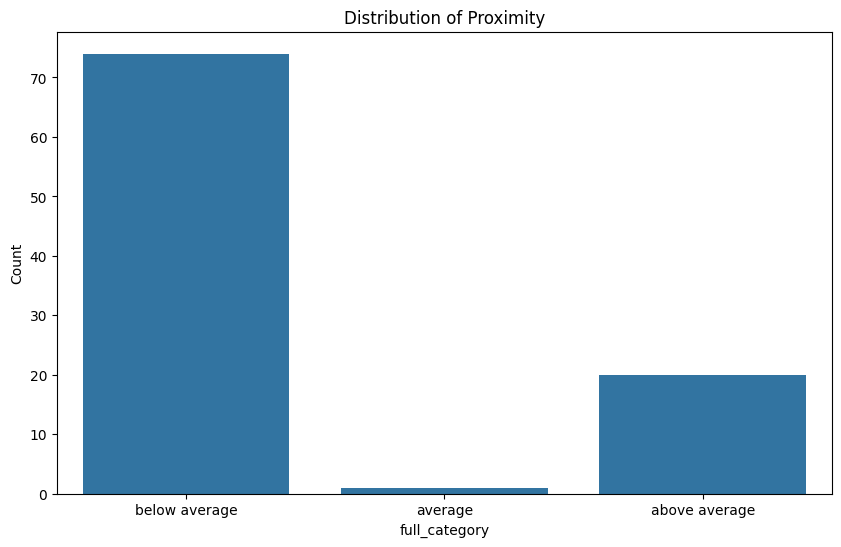

95
Distribution:
full_category
1.0    77.894737
2.0     1.052632
3.0    21.052632
Name: count, dtype: float64


In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='full_category')
plt.title("Distribution of Proximity")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ['below average', 'average', 'above average'])
plt.show()

category_counts = filtered_data["full_category"].value_counts().sort_index() # Sort to match x-axis order
total_count = category_counts.sum()
category_percentages = (category_counts / total_count) * 100
print(len(filtered_data['full_category']))
print("Distribution:")
print(category_percentages)

In [6]:
# Compare IOP to actual proximity
accurate_count = (filtered_data['IOP'] == filtered_data['full_category']).sum()
iop_higher_count = (filtered_data['IOP'] > filtered_data['full_category']).sum()
proximity_higher_count = (filtered_data['IOP'] < filtered_data['full_category']).sum()

print(f"\nComparison Results:")
print(f"Both the same: {accurate_count} times")
print(f"IOP Higher: {iop_higher_count} times")
print(f"Proximity Higher: {proximity_higher_count} times")


Comparison Results:
Both the same: 17 times
IOP Higher: 64 times
Proximity Higher: 14 times


<ipython-input-7-34f6b6190f51>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Proximity Category')


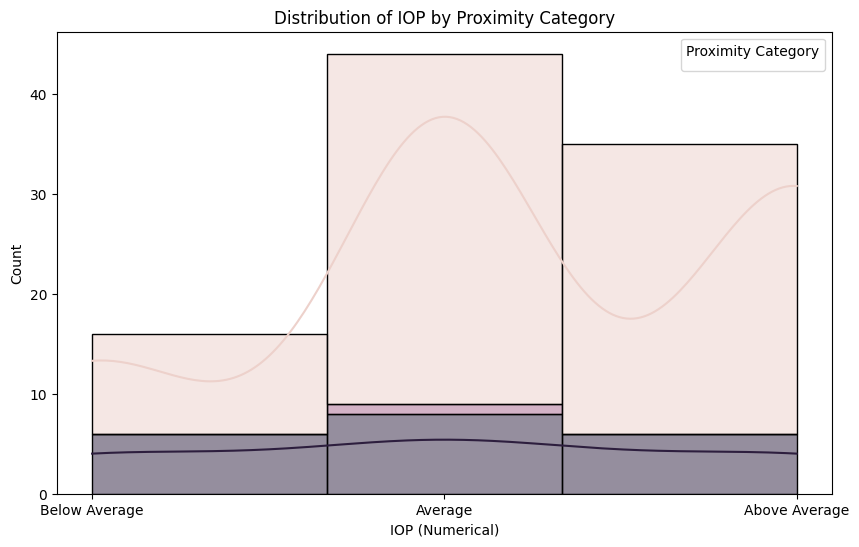

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='IOP', hue='full_category', multiple='stack', bins=3, kde=True)
plt.title('Distribution of IOP by Proximity Category')
plt.xlabel('IOP (Numerical)')
plt.ylabel('Count')
plt.xticks([1, 2, 3], ['Below Average', 'Average', 'Above Average'])
plt.legend(title='Proximity Category')
plt.show()
#within each bar (IOP values), colours indicate distribution of Proximity scores. Light to dark corresponds to below to above avg


In [8]:
from sklearn.metrics import classification_report

true_labels = filtered_data['full_category']
predicted_labels = filtered_data['IOP']


report = classification_report(true_labels, predicted_labels,
                             target_names=['Below Average', 'Average', 'Above Average'])

print("Classification Report (IOP as Predictor for Proximity):")
print(report)

Classification Report (IOP as Predictor for Proximity):
               precision    recall  f1-score   support

Below Average       0.62      0.14      0.22        74
      Average       0.02      1.00      0.04         1
Above Average       0.17      0.30      0.22        20

     accuracy                           0.18        95
    macro avg       0.27      0.48      0.16        95
 weighted avg       0.52      0.18      0.22        95



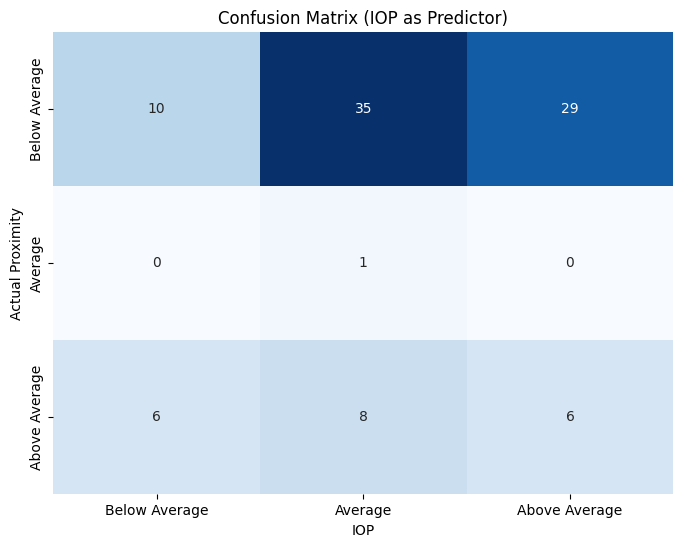

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Confusion Matrix 
cm = confusion_matrix(true_labels, predicted_labels)

cm_df = pd.DataFrame(cm,
                     index=['Below Average', 'Average', 'Above Average'],
                     columns=['Below Average', 'Average', 'Above Average'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (IOP as Predictor)')
plt.xlabel('IOP')
plt.ylabel('Actual Proximity')
plt.show()



In [10]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table of the two variables
cross_tab = pd.crosstab(filtered_data['full_category'], filtered_data['IOP'])

# Perform the Chi-Squared test

chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(cross_tab)

print(f"\nChi-Squared Test of Independence:")
print(f"Chi2 Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

alpha = 0.05

print(f"\nInterpretation (at alpha = {alpha}):")

print("The p-value is greater than the significance level.")
print("We fail to reject the null hypothesis that IOP and Proximity are independent.")
print("There is no statistically significant association between IOP and Proximity (based on this sample).")


Chi-Squared Test of Independence:
Chi2 Statistic: 4.254242716742717
P-value: 0.3726899378652186
Degrees of Freedom: 4

Interpretation (at alpha = 0.05):
The p-value is greater than the significance level.
We fail to reject the null hypothesis that IOP and Proximity are independent.
There is no statistically significant association between IOP and Proximity (based on this sample).


STRS vs Proximity:

In [11]:
# Drop rows where STRS_total is missing
filtered_data_strs = filtered_data.dropna(subset=['STRS_total'])

category_labels = {
    1: "below average",
    2: "average",
    3: "above average"
}
filtered_data_strs['full_category_label'] = filtered_data_strs['full_category'].map(category_labels)

avg_strs_per_category = filtered_data_strs.groupby('full_category_label')['STRS_total'].mean().reset_index()

avg_strs_per_category



,full_category_label,STRS_total
0,above average,41.200000
1,average,34.000000
2,below average,41.364865


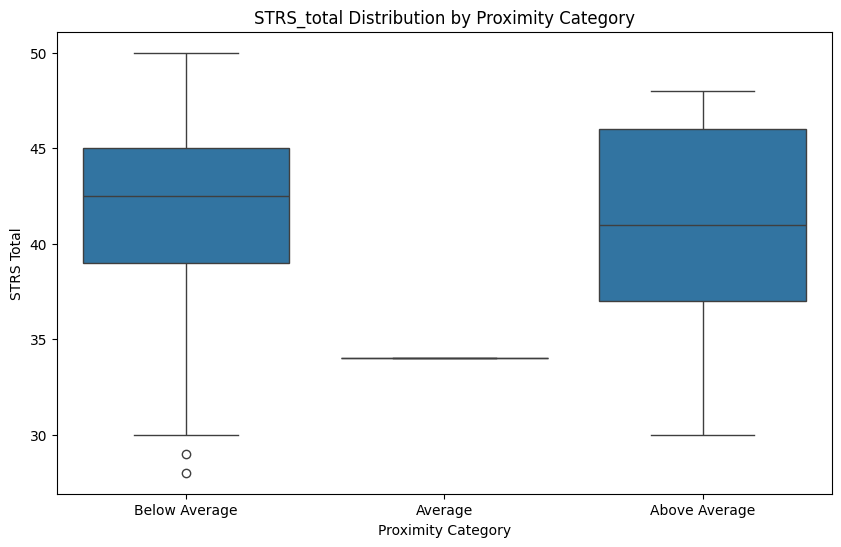

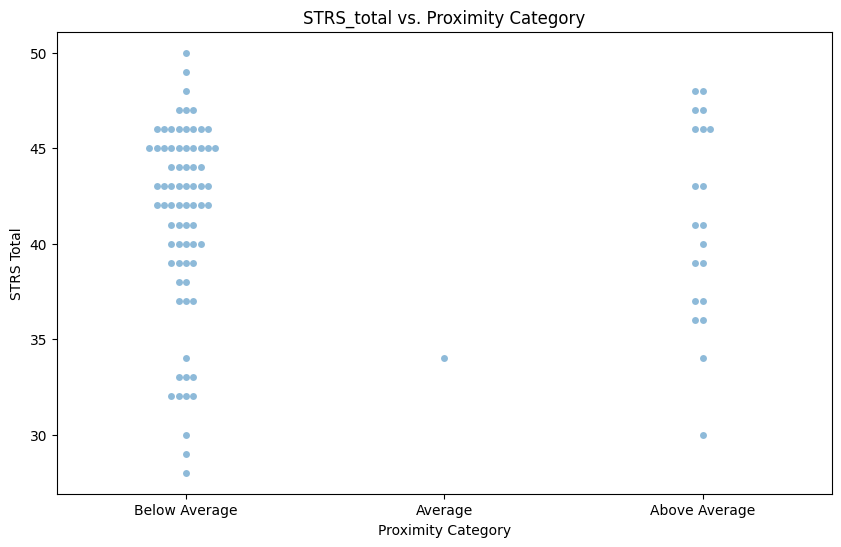

In [12]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='full_category', y='STRS_total', data=filtered_data_strs)
plt.title('STRS_total Distribution by Proximity Category')
plt.xlabel('Proximity Category')
plt.ylabel('STRS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average'])
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='full_category', y='STRS_total', data=filtered_data_strs, alpha=0.5)
plt.title('STRS_total vs. Proximity Category')
plt.xlabel('Proximity Category')
plt.ylabel('STRS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average'])
plt.show()


In [13]:
#ANOVA = Analysis of Variance (used when comparing ordinal and numerical values)
import statsmodels.api as sm
from statsmodels.formula.api import ols


#STRS_total ~ C(full_category)models STRS_total based on full_category, treating full_category as categorical
anova_model = ols('STRS_total ~ C(full_category)', data=filtered_data_strs).fit()
anova_table = sm.stats.anova_lm(anova_model)

print("\nANOVA Test for STRS_total Across Proximity Categories:")
print(anova_table)

#Interpertation
alpha = 0.05
print(f"\nInterpretation of ANOVA (at alpha = {alpha}):")

print("The p-value is greater than the significance level.")
print("We fail to reject the null hypothesis that the means of STRS_total are equal across all proximity categories.")
print("There is no statistically significant difference in STRS_total means among the proximity categories (based on this sample).")







ANOVA Test for STRS_total Across Proximity Categories:
                    df       sum_sq    mean_sq         F    PR(>F)
C(full_category)   2.0    53.588193  26.794097  1.055089  0.352336
Residual          92.0  2336.348649  25.395094       NaN       NaN

Interpretation of ANOVA (at alpha = 0.05):
The p-value is greater than the significance level.
We fail to reject the null hypothesis that the means of STRS_total are equal across all proximity categories.
There is no statistically significant difference in STRS_total means among the proximity categories (based on this sample).


In [14]:
from scipy.stats import spearmanr

#Calculating Spearman Correlation
spearman_corr, spearman_p = spearmanr(filtered_data_strs['full_category'], filtered_data_strs['STRS_total'])


print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-value: {spearman_p:.4f}")

# Interpertation
print(f"\nInterpretation of Spearman Correlation (at alpha = {alpha}):")
if spearman_p < alpha:
    print("The p-value is less than the significance level.")
    print("There is a statistically significant monotonic relationship between proximity category and STRS_total.")
    if spearman_corr > 0:
        print("The relationship is positive: as proximity increases, STRS_total tends to increase.")
    elif spearman_corr < 0:
        print("The relationship is negative: as proximity increases, STRS_total tends to decrease.")
    else:
        print("The correlation is close to zero, indicating a very weak or no monotonic relationship.")
else:
    print("The p-value is greater than the significance level.")
    print("There is no statistically significant monotonic relationship between proximity category and STRS_total (based on this sample).")
#Note: A lack of significant monotonic correlation does not necessarily mean no relationship at all, but it suggests the relationship is not consistently increasing or decreasing

Spearman Correlation Coefficient: -0.0284
Spearman P-value: 0.7846

Interpretation of Spearman Correlation (at alpha = 0.05):
The p-value is greater than the significance level.
There is no statistically significant monotonic relationship between proximity category and STRS_total (based on this sample).


SPARTS vs Proximity:


In [15]:
# Drop rows where SPARTS_total is missing
filtered_data_sparts = filtered_data.dropna(subset=['SPARTS_total'])

category_labels = {
    1: "below average",
    2: "average",
    3: "above average"
}
filtered_data_sparts['full_category_label'] = filtered_data_sparts['full_category'].map(category_labels)

avg_sparts_per_category = filtered_data_sparts.groupby('full_category_label')['SPARTS_total'].mean().reset_index()

avg_sparts_per_category



<ipython-input-15-809091f1ce55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_sparts['full_category_label'] = filtered_data_sparts['full_category'].map(category_labels)


,full_category_label,SPARTS_total
0,above average,27.166667
1,average,31.000000
2,below average,27.000000


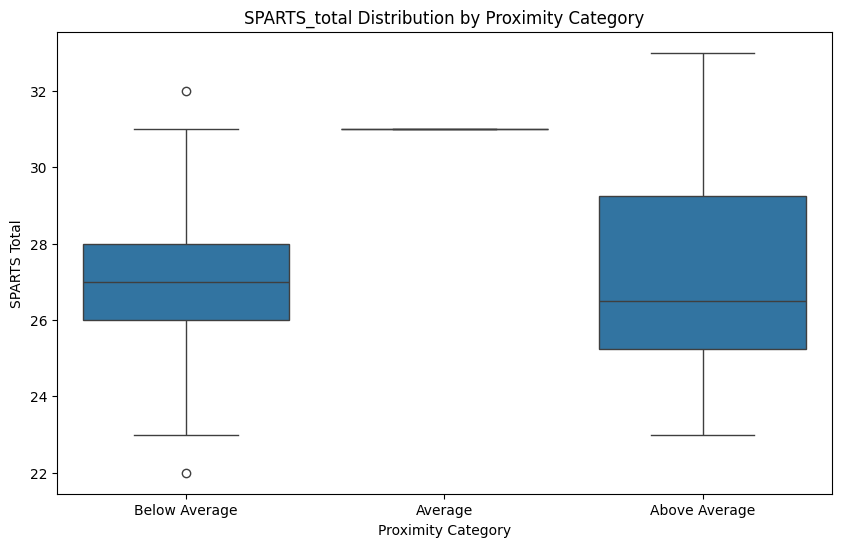

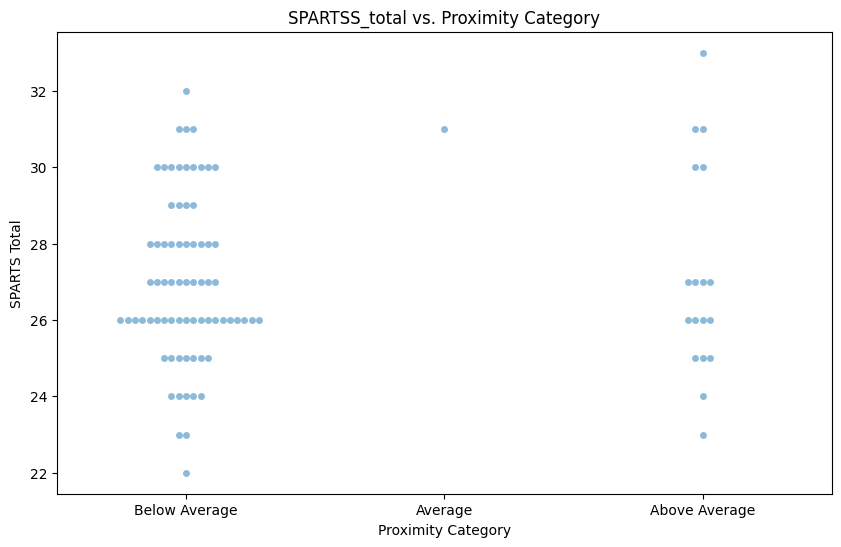

In [16]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='full_category', y='SPARTS_total', data=filtered_data_strs)
plt.title('SPARTS_total Distribution by Proximity Category')
plt.xlabel('Proximity Category')
plt.ylabel('SPARTS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average'])
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='full_category', y='SPARTS_total', data=filtered_data_strs, alpha=0.5)
plt.title('SPARTSS_total vs. Proximity Category')
plt.xlabel('Proximity Category')
plt.ylabel('SPARTS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average'])
plt.show()


In [17]:
anova_model = ols('SPARTS_total ~ C(full_category)', data=filtered_data_strs).fit()
anova_table = sm.stats.anova_lm(anova_model)

print("\nANOVA Test for SPARTS_total Across Proximity Categories:")
print(anova_table)

#Interpertation
alpha = 0.05
print(f"\nInterpretation of ANOVA (at alpha = {alpha}):")

print("The p-value (PR(>F)) is greater than the significance level.")
print("We fail to reject the null hypothesis that the means of SPARTS_total are equal across all proximity categories.")
print("There is no statistically significant difference in SPARTS_total means among the proximity categories (based on this sample).")







ANOVA Test for SPARTS_total Across Proximity Categories:
                    df      sum_sq   mean_sq         F   PR(>F)
C(full_category)   2.0   15.961538  7.980769  1.538462  0.22043
Residual          88.0  456.500000  5.187500       NaN      NaN

Interpretation of ANOVA (at alpha = 0.05):
The p-value (PR(>F)) is greater than the significance level.
We fail to reject the null hypothesis that the means of SPARTS_total are equal across all proximity categories.
There is no statistically significant difference in SPARTS_total means among the proximity categories (based on this sample).


In [18]:
spearman_corr, spearman_p = spearmanr(filtered_data_sparts['full_category'], filtered_data_sparts['SPARTS_total'])


print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-value: {spearman_p:.4f}")

# Interpertation
print(f"\nInterpretation of Spearman Correlation (at alpha = {alpha}):")
if spearman_p < alpha:
    print("The p-value is less than the significance level.")
    print("There is a statistically significant monotonic relationship between proximity category and SPARTS_total.")
    if spearman_corr > 0:
        print("The relationship is positive: as proximity increases, SPARTRS_total tends to increase.")
    elif spearman_corr < 0:
        print("The relationship is negative: as proximity increases, SPARTSS_total tends to decrease.")
    else:
        print("The correlation is close to zero, indicating a very weak or no monotonic relationship.")
else:
    print("The p-value is greater than the significance level.")
    print("There is no statistically significant monotonic relationship between proximity category and SPARTRS_total (based on this sample).")
#Note: A lack of significant monotonic correlation does not necessarily mean no relationship at all, but it suggests the relationship is not consistently increasing or decreasing

Spearman Correlation Coefficient: 0.0181
Spearman P-value: 0.8651

Interpretation of Spearman Correlation (at alpha = 0.05):
The p-value is greater than the significance level.
There is no statistically significant monotonic relationship between proximity category and SPARTRS_total (based on this sample).


STRS vs IOP:


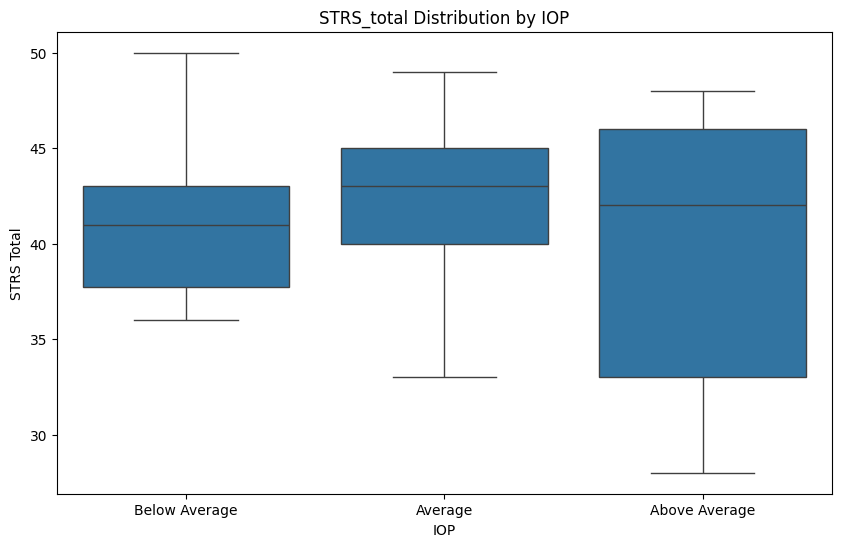

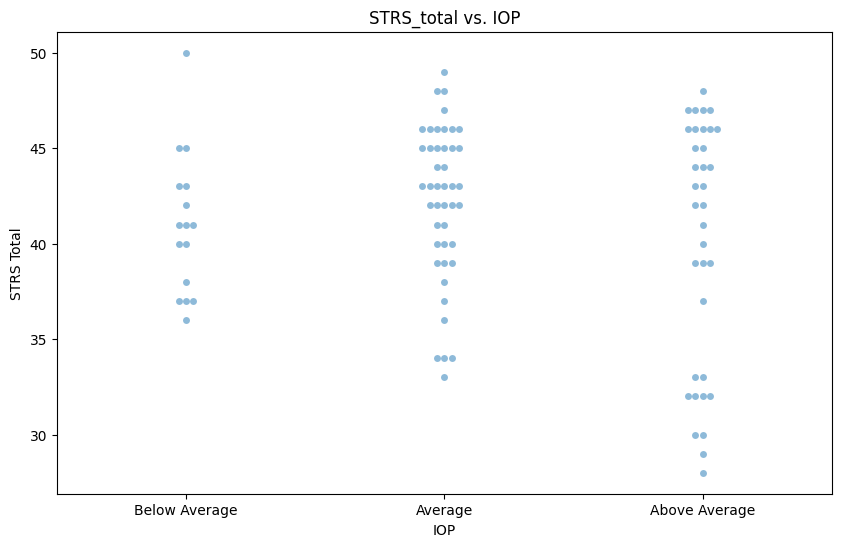


ANOVA Test for STRS_total Across IOP Categories:
            df       sum_sq    mean_sq         F    PR(>F)
C(IOP)     2.0    90.143985  45.071992  1.803042  0.170571
Residual  92.0  2299.792857  24.997748       NaN       NaN

Interpretation of ANOVA (at alpha = 0.05):
The p-value is greater than the significance level.
We fail to reject the null hypothesis that the means of STRS_total are equal across all IOP categories.
There is no statistically significant difference in STRS_total means among the IOP categories (based on this sample).

Spearman Correlation Coefficient: -0.0039
Spearman P-value: 0.9699

Interpretation of Spearman Correlation (at alpha = 0.05):
The p-value is greater than the significance level.
There is no statistically significant monotonic relationship between IOP category and STRS_total (based on this sample).


<ipython-input-19-3c63be9bfeb8>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


In [19]:
# Drop rows where STRS_total is missing
filtered_data_strs_iop = filtered_data.dropna(subset=['STRS_total', 'IOP'])

iop_category_labels = {
    1: "below average",
    2: "average",
    3: "above average"
}
filtered_data_strs_iop['IOP_label'] = filtered_data_strs_iop['IOP'].map(iop_category_labels)

avg_strs_per_iop = filtered_data_strs_iop.groupby('IOP_label')['STRS_total'].mean().reset_index()

avg_strs_per_iop

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='IOP', y='STRS_total', data=filtered_data_strs_iop)
plt.title('STRS_total Distribution by IOP')
plt.xlabel('IOP')
plt.ylabel('STRS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average'])
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='IOP', y='STRS_total', data=filtered_data_strs_iop, alpha=0.5)
plt.title('STRS_total vs. IOP')
plt.xlabel('IOP')
plt.ylabel('STRS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average'])
plt.show()

#ANOVA = Analysis of Variance (used when comparing ordinal and numerical values)


#STRS_total ~ C(IOP) models STRS_total based on IOP, treating IOP as categorical
anova_model = ols('STRS_total ~ C(IOP)', data=filtered_data_strs_iop).fit()
anova_table = sm.stats.anova_lm(anova_model)

print("\nANOVA Test for STRS_total Across IOP Categories:")
print(anova_table)

#Interpertation
alpha = 0.05
print(f"\nInterpretation of ANOVA (at alpha = {alpha}):")

if anova_table['PR(>F)'][0] < alpha:
    print("The p-value is less than the significance level.")
    print("We reject the null hypothesis that the means of STRS_total are equal across all IOP categories.")
    print("There is a statistically significant difference in STRS_total means among the IOP categories (based on this sample).")
else:
    print("The p-value is greater than the significance level.")
    print("We fail to reject the null hypothesis that the means of STRS_total are equal across all IOP categories.")
    print("There is no statistically significant difference in STRS_total means among the IOP categories (based on this sample).")

#Calculating Spearman Correlation
spearman_corr, spearman_p = spearmanr(filtered_data_strs_iop['IOP'], filtered_data_strs_iop['STRS_total'])

print(f"\nSpearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-value: {spearman_p:.4f}")

# Interpertation
print(f"\nInterpretation of Spearman Correlation (at alpha = {alpha}):")
if spearman_p < alpha:
    print("The p-value is less than the significance level.")
    print("There is a statistically significant monotonic relationship between IOP category and STRS_total.")
    if spearman_corr > 0:
        print("The relationship is positive: as IOP increases, STRS_total tends to increase.")
    elif spearman_corr < 0:
        print("The relationship is negative: as IOP increases, STRS_total tends to decrease.")
    else:
        print("The correlation is close to zero, indicating a very weak or no monotonic relationship.")
else:
    print("The p-value is greater than the significance level.")
    print("There is no statistically significant monotonic relationship between IOP category and STRS_total (based on this sample).")
#Note: A lack of significant monotonic correlation does not necessarily mean no relationship at all, but it suggests the relationship is not consistently increasing or decreasing



<ipython-input-20-c11ef03ba148>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_sparts_iop['IOP_label'] = filtered_data_sparts_iop['IOP'].map(iop_category_labels)


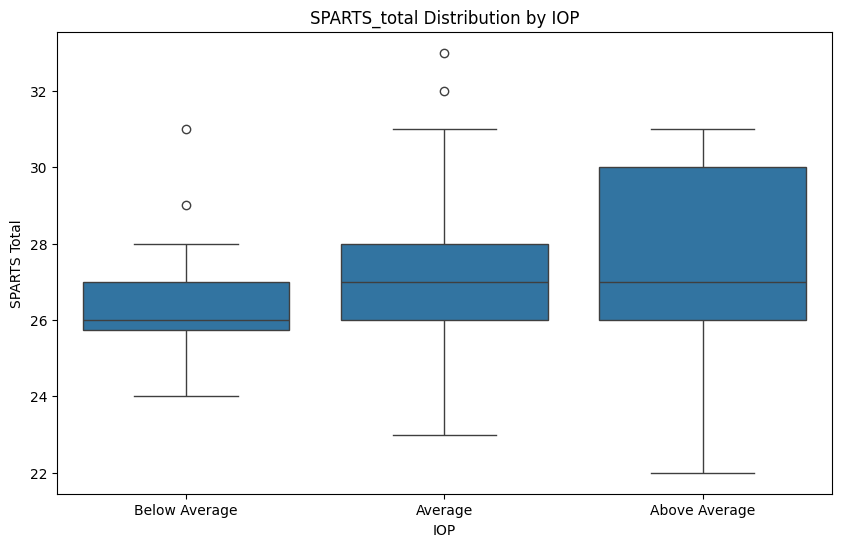

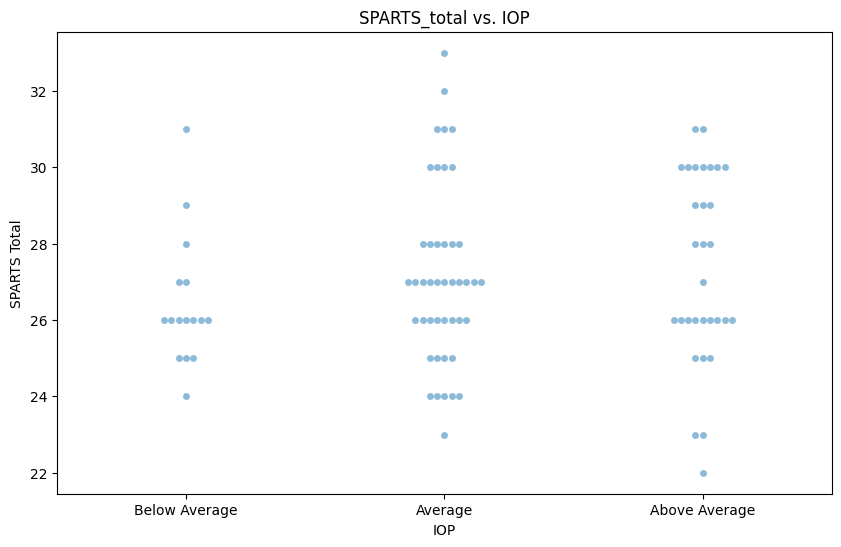


ANOVA Test for SPARTS_total Across IOP Categories:
            df      sum_sq   mean_sq         F    PR(>F)
C(IOP)     2.0    8.568027  4.284013  0.812672  0.446973
Residual  88.0  463.893512  5.271517       NaN       NaN

Interpretation of ANOVA (at alpha = 0.05):
The p-value is greater than the significance level.
We fail to reject the null hypothesis that the means of SPARTS_total are equal across all IOP categories.
There is no statistically significant difference in SPARTS_total means among the IOP categories (based on this sample).

Spearman Correlation Coefficient: 0.1302
Spearman P-value: 0.2187

Interpretation of Spearman Correlation (at alpha = 0.05):
The p-value is greater than the significance level.
There is no statistically significant monotonic relationship between IOP category and SPARTS_total (based on this sample).


<ipython-input-20-c11ef03ba148>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


In [20]:
# Drop rows where SPARTS_total is missing
filtered_data_sparts_iop = filtered_data.dropna(subset=['SPARTS_total', 'IOP'])

iop_category_labels = {
    1: "below average",
    2: "average",
    3: "above average"
}
filtered_data_sparts_iop['IOP_label'] = filtered_data_sparts_iop['IOP'].map(iop_category_labels)

avg_sparts_per_iop = filtered_data_sparts_iop.groupby('IOP_label')['SPARTS_total'].mean().reset_index()

avg_sparts_per_iop

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='IOP', y='SPARTS_total', data=filtered_data_sparts_iop)
plt.title('SPARTS_total Distribution by IOP')
plt.xlabel('IOP')
plt.ylabel('SPARTS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average']) # Corrected xticks
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='IOP', y='SPARTS_total', data=filtered_data_sparts_iop, alpha=0.5)
plt.title('SPARTS_total vs. IOP')
plt.xlabel('IOP')
plt.ylabel('SPARTS Total')
plt.xticks([0, 1, 2], ['Below Average', 'Average', 'Above Average']) # Corrected xticks
plt.show()

#ANOVA = Analysis of Variance (used when comparing ordinal and numerical values)


#SPARTS_total ~ C(IOP) models SPARTS_total based on IOP, treating IOP as categorical
anova_model = ols('SPARTS_total ~ C(IOP)', data=filtered_data_sparts_iop).fit()
anova_table = sm.stats.anova_lm(anova_model)

print("\nANOVA Test for SPARTS_total Across IOP Categories:")
print(anova_table)

#Interpertation
alpha = 0.05
print(f"\nInterpretation of ANOVA (at alpha = {alpha}):")

if anova_table['PR(>F)'][0] < alpha:
    print("The p-value is less than the significance level.")
    print("We reject the null hypothesis that the means of SPARTS_total are equal across all IOP categories.")
    print("There is a statistically significant difference in SPARTS_total means among the IOP categories (based on this sample).")
else:
    print("The p-value is greater than the significance level.")
    print("We fail to reject the null hypothesis that the means of SPARTS_total are equal across all IOP categories.")
    print("There is no statistically significant difference in SPARTS_total means among the IOP categories (based on this sample).")


#Calculating Spearman Correlation
spearman_corr, spearman_p = spearmanr(filtered_data_sparts_iop['IOP'], filtered_data_sparts_iop['SPARTS_total'])


print(f"\nSpearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-value: {spearman_p:.4f}")

# Interpertation
print(f"\nInterpretation of Spearman Correlation (at alpha = {alpha}):")
if spearman_p < alpha:
    print("The p-value is less than the significance level.")
    print("There is a statistically significant monotonic relationship between IOP category and SPARTS_total.")
    if spearman_corr > 0:
        print("The relationship is positive: as IOP increases, SPARTS_total tends to increase.")
    elif spearman_corr < 0:
        print("The relationship is negative: as IOP increases, SPARTS_total tends to decrease.")
    else:
        print("The correlation is close to zero, indicating a very weak or no monotonic relationship.")
else:
    print("The p-value is greater than the significance level.")
    print("There is no statistically significant monotonic relationship between IOP category and SPARTS_total (based on this sample).")
#Note: A lack of significant monotonic correlation does not necessarily mean no relationship at all, but it suggests the relationship is not consistently increasing or decreasing
